In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as io
import csv

from umap import UMAP
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

In [8]:
# get the line count
!wc -l ../data//brain_top

 174127706 ../data/brain_top


In [9]:
from collections import defaultdict

In [22]:
# the matrix is not in a typical mtx file format, so we need to find out some info about it
rows = defaultdict(int)
cols = defaultdict(int)

with open('../data/brain_top') as f:
    reader = csv.reader(f, delimiter='\t')
    
    for l in reader:
        r, c, v = map(float, l)
        rows[r] += 1
        cols[c] += 1

In [35]:
row_holder = []
col_holder = []
val_holder = []
with open('../data/brain_top') as f:
    reader = csv.reader(f, delimiter='\t')
    
    for l in reader:
        r, c, v = map(float, l)
        row_holder.append(int(r))
        col_holder.append(int(c))
        val_holder.append(v)

In [37]:
row_holder = list(map(lambda x: id_dict[x], row_holder))
col_holder = list(map(lambda x: id_dict[x], col_holder))

In [38]:
row_holder = np.array(row_holder)
col_holder = np.array(col_holder)
val_holder = np.array(val_holder)

In [41]:
dat = sparse.coo_matrix((val_holder, (row_holder, col_holder)), shape = (33899,33899))

In [42]:
sparse.save_npz("brain_top.npz", dat)

In [44]:
embed = SpectralEmbedding(affinity='precomputed', n_jobs=4)
coords = embed.fit_transform(dat.todense())

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:883: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  warnings.warn("Array is not symmetric, and will be converted "


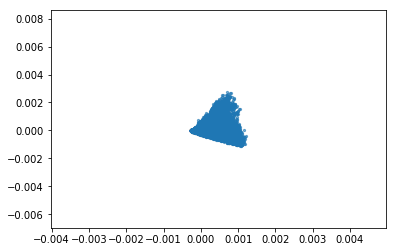

In [45]:
plt.scatter(coords[:,0], coords[:,1], s=5, alpha=.6)
plt.show()

In [50]:
u = UMAP(metric='precomputed', min_dist=.5)
coords = u.fit_transform(1 - dat.todense())

/anaconda3/lib/python3.6/site-packages/umap/umap_.py:1439: UserWarning: Using precomputed metric; transform will be unavailable for new data
  warn('Using precomputed metric; transform will be unavailable for new data')


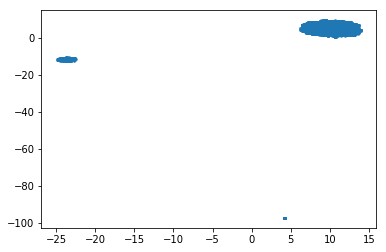

In [51]:
plt.scatter(coords[:,0], coords[:,1], s=4, alpha=.6)
plt.show()

In [53]:
from sklearn.utils.graph_shortest_path import graph_shortest_path

In [56]:
dat.max()

0.99847

In [58]:
from copy import copy
dat_inv = copy(dat)

In [64]:
dat_inv.data = 1 - dat_inv.data 

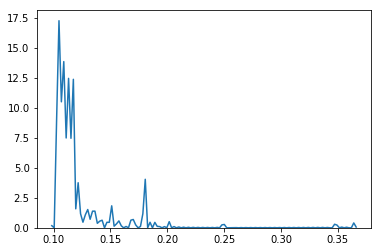

In [63]:
import seaborn as sns
sns.kdeplot(np.random.choice(dat.data, 1000))
plt.show()

In [ ]:
geodesic_distances = graph_shortest_path(dat_inv, directed=True)

In [ ]:
u_geo = UMAP(metric='precomputed', n_neighbors=30)
coords_geo = u_geo.fit_transform(geodesic_distances)

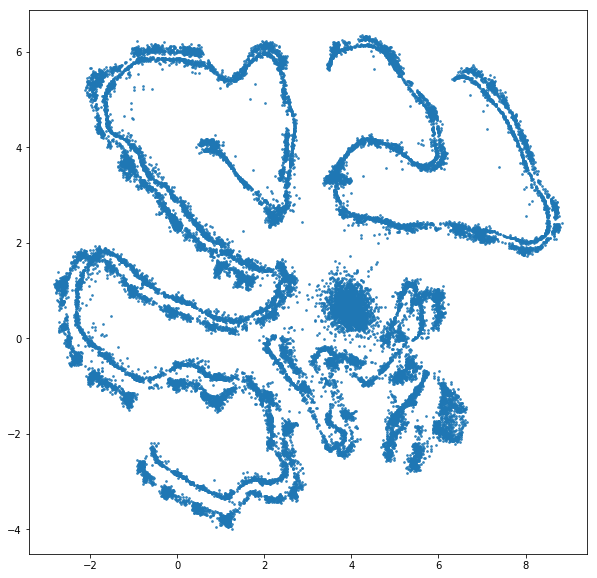

In [71]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(coords_geo[:,0], coords_geo[:,1], alpha=.8, s = 3)
plt.show()

In [70]:
# laplacian normalization
# L^(alpha) = D^(-alpha) * L * D^(alpha)
# D_i,i = sum_j L_i,j

def normalize_laplac(affinity_mat, alpha=.5, return_diag=True):
    diag_values = np.sum(affinity_mat, axis=1)
    diag_values = np.pow(diag_values, -alpha)
    
    normalized_laplac = np.multiply(np.multiply(diag_values, affinity_mat), affinity_mat)
    
    if return_diag:
        return normalized_laplac, diag_values
    else:
        return normalized_laplac


In [23]:
# max = 100510874
print(len(rows))
print(len(cols))

33897
33894


In [25]:
len(set(rows.keys()) | set(cols.keys()))

33899

In [29]:
id_dict = {int(y):x for x,y in enumerate(set(rows.keys()) | set(cols.keys()))}

In [34]:
#pd.DataFrame(pd.Series(id_dict), columns=['mtx_id']).to_csv('../data/mtx_id.csv')

In [26]:
# 33899 unique nodes